# 英國脫歐文字探勘

TF-IDF練習:使用2019英國脫歐相關新聞

In [1]:
from collections import Counter
import jieba
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys

from fintextmin import *  # 使用 modules 中的 fintextmin 模組

將指定路徑之新聞載入

In [2]:
text_list = read_text_folder("./data/")
print("document number:", len(text_list))

document number: 10


In [3]:
def add_word(list):
    for items in list:
        jieba.add_word(items)

#建立字典        
#add_word(['英國脫歐','梅克爾','國會','最後','反對','梅伊'])

jieba.load_userdict('dict.txt') #字典用載入的方式

## [原生 python 寫法]
doc_names = range(len(text_list))
dwc = {key: [word for word in jieba.cut(text, cut_all=False)] for (key, text) in zip(doc_names, text_list)}


## [使用 fintextmin 模組]
stopwords = [''] 
dwc = count_words_in_documents(doc_list = text_list,
                              doc_names = range(len(text_list)),
                              stopwords = stopwords)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\user\AppData\Local\Temp\jieba.cache
Loading model cost 0.796 seconds.
Prefix dict has been built succesfully.


In [4]:
## [原生 python 寫法] 
doc_word_frequency = {key: {i:Counter(doc)[i] for i in Counter(doc)} for key, doc in dwc.items()}
#doc是變數名稱

list(doc_word_frequency[0].items())[0:10] # 顯示第一篇文章的部份詞彙與對應詞頻

#doc_word_frequency
## [使用 fintextmin 寫法]
# doc_word_frequency = create_word_frequency_matrix(dwc)

[('若', 2),
 ('英國脫歐', 1),
 ('協議', 6),
 ('不獲', 2),
 ('國會', 3),
 ('通過', 4),
 (' ', 1),
 ('傳', 1),
 ('梅克爾', 2),
 ('會', 2)]

In [5]:
## [原生 python 寫法] 
dwf_list = [pd.DataFrame(list(doc.values()), index=doc.keys()) for doc in doc_word_frequency.values()]
wfm = pd.concat(dwf_list, axis= 1)
wfm = np.transpose(wfm).fillna(0)
wfm.index = doc_word_frequency.keys()

puncs = set_puncs() # 因為一開始沒有清除標點符號,這邊回過頭來將它們自矩陣移除
wfm = wfm[list(set(wfm) - set(puncs))]
wfm # 詞頻矩陣完成

## [使用 fintextmin 寫法]
# wfm = create_word_frequency_matrix(dwc)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  This is separate from the ipykernel package so we can avoid doing imports until


,向,不少,日用品,因為,僵持不下,具有,隨即,昨日,廠大,美國,...,事,發表,清晨,韻聿,明確否,下旬,接下,聯盟,就是,機制
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,0.0,4.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
7,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer

## [原生 python 寫法] 
transformer = TfidfTransformer()
tfidf_gen = transformer.fit_transform(wfm) # 產生一個 tfidf 矩陣的 generator
df_tfidf = pd.DataFrame(tfidf_gen.toarray(), columns=wfm.columns)
df_tfidf

## [使用 fintextmin 寫法]
#df_tfidf = evaluate_tfidf(wfm)

,向,不少,日用品,因為,僵持不下,具有,隨即,昨日,廠大,美國,...,事,發表,清晨,韻聿,明確否,下旬,接下,聯盟,就是,機制
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.090248,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.060585,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.103005,0.000000
3,0.000000,0.164998,0.123748,0.105197,0.000000,0.000000,0.000000,0.000000,0.041249,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.056744,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.02162,0.000000,0.000000,0.000000,0.000000,0.025432,0.000000,0.000000,0.000000,0.025432
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.04717,0.055488,0.000000,0.055488,0.000000,0.000000,0.055488,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.051352,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.154055,0.000000
7,0.066473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.068195,0.000000,0.000000,0.000000,0.000000,0.030564,0.030564,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.030564,0.000000,0.000000,0.122257,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046115,0.000000,0.046115,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


![avatar](https://1.bp.blogspot.com/-tnzPA6dDtTU/Vw6EWm_PjCI/AAAAAAABDwI/JatHtUJb4fsce9E-Ns5t02_nakFtGrsugCLcB/s1600/%25E8%259E%25A2%25E5%25B9%2595%25E5%25BF%25AB%25E7%2585%25A7%2B2016-04-14%2B%25E4%25B8%258A%25E5%258D%25881.39.07.png)

In [7]:
wfm
#df_tfidf =  pd.DataFrame(wfm.toarray(),columns=wfm.columns)

N = len(text_list)
dfif = wfm > 0
df = dfif.sum(axis=0)

import math

out = N/df

logdf = [math.log10(i) for i in out.values]

In [8]:
wfm

,向,不少,日用品,因為,僵持不下,具有,隨即,昨日,廠大,美國,...,事,發表,清晨,韻聿,明確否,下旬,接下,聯盟,就是,機制
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,0.0,4.0,3.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
7,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
for i in range(1,N):
    df_tfidf[:i] = wfm[:i] * logdf

In [10]:
df_tfidf

,向,不少,日用品,因為,僵持不下,具有,隨即,昨日,廠大,美國,...,事,發表,清晨,韻聿,明確否,下旬,接下,聯盟,就是,機制
0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.00000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
1,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,0.000000,0.0,0.0,0.00000,1.0,0.0,0.0,0.000000,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.39794,0.0
3,0.000000,4.0,3.0,2.09691,0.0,0.0,0.0,0.000000,1.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,1.568636,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.69897,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.00000,1.0
5,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.69897,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.00000,0.0
6,0.000000,0.0,0.0,0.69897,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.09691,0.0
7,1.045757,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
8,1.568636,0.0,0.0,0.00000,0.0,1.0,1.0,0.000000,0.0,0.000000,...,0.00000,0.0,0.0,0.0,1.0,0.0,0.0,4.0,0.00000,0.0
9,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.046115,0.0,0.046115,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [11]:
wfm['英國']

0     5.0
1     8.0
2     4.0
3     5.0
4    27.0
5     7.0
6    12.0
7     3.0
8     8.0
9     3.0
Name: 英國, dtype: float64

In [12]:
df_tfidf['英國']

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.000000
6    0.000000
7    0.000000
8    0.000000
9    0.051149
Name: 英國, dtype: float64

In [13]:
first_text = wfm.to_dict(orient='records')[0] # 將詞頻矩陣轉換成dictionary型別, 把第一篇文章抽出來
list(first_text.items())[0:10] # 檢視一下轉換結果

[('向', 0.0),
 ('不少', 0.0),
 ('日用品', 0.0),
 ('因為', 0.0),
 ('僵持不下', 0.0),
 ('具有', 0.0),
 ('隨即', 0.0),
 ('昨日', 0.0),
 ('廠大', 0.0),
 ('美國', 0.0)]

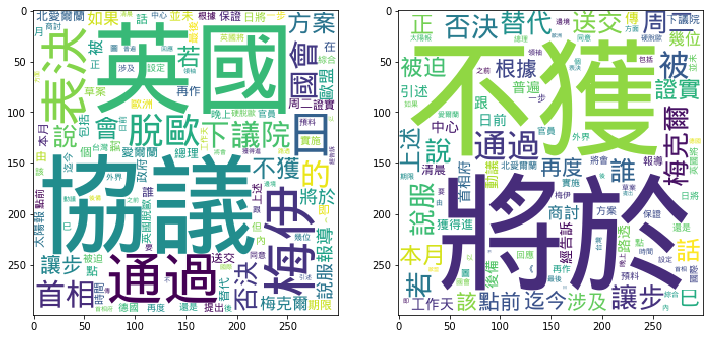

In [14]:
linux_font = r'wqy-microhei.ttc'

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(121)
plot_wordcloud(first_text, ax=ax1, font_path=linux_font, height=300, width=300)

ax2 = plt.subplot(122)
plot_tfidf_wordcloud(df_tfidf, text_index=0, ax=ax2, font_path=linux_font, height=300, width=300)